# Training for Kaggle Dataset
Using this [Cryptocurrency Price Analysis Dataset from Kaggle](https://www.kaggle.com/datasets/adityamhaske/cryptocurrency-price-analysis-dataset/data) as proof-of-concept.

## Setup

In [1]:
# Automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
####################
# Required Modules #
####################

# Libs
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# Custom
from src.dataset import *
from src.models import *
from src.train_eval import *

c:\Users\Ryan Lee\.conda\envs\term6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare Dataset
Download the dataset from the Kaggle [page](https://www.kaggle.com/datasets/adityamhaske/cryptocurrency-price-analysis-dataset/data). Alternatively, you can use the following `kagglehub` to download the dataset:

```python
import kagglehub

# Download latest version
csv_path = kagglehub.dataset_download("adityamhaske/cryptocurrency-price-analysis-dataset")

print("Path to dataset files:", path)
```


In [3]:
# Update the path to the `crypto_combine.csv` file below:
csv_path = "data/kaggle_crypto_price_prediction/crypto_combine.csv"
seq_length = 5
batch_size = 128

# Create the dataset
dataset = CryptoDataset(csv_path, seq_length=seq_length)

print(f"Total sequences: {len(dataset)}")
print("Crypto mapping:", dataset.crypto_to_idx)

c:\Users\Ryan Lee\Desktop\50.038 Computational Data Science\Digital-Asset-Prediction\src\dataset.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['Date'] = pd.to_datetime(self.df['Date']) # Datetime conversion


Total sequences: 7879
Crypto mapping: {'BTC': 0, 'ETH': 1, 'LTC': 2, 'XRP': 3}


In [4]:
# Split into train and validation set
train_dataset, val_dataset = random_split(dataset, [0.8, 0.2])

In [5]:
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Training
`train_model` will save model parameters to `saved_models` directory.

In [6]:
learning_rate = 0.001 # standard for Adam
num_epochs = 5000
save_interval = num_epochs // 10

In [ ]:
model = CryptoGRU(input_size=4, embed_dim=4, hidden_size=64, num_layers=1)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
training_loss_history, validation_loss_history, mae_history, r2_history = train_model(
    model, optimizer, train_loader, val_loader,
    num_epochs=num_epochs, save_interval=save_interval
)

CryptoGRU model loaded on cuda.
Epoch [1/5000] | Time: 1.38s
(Training) Loss: 1390000.2126
(Validation) Loss: 1439565.3587, MAE: 5493.0205, R2: -0.2104
✅ Model saved: saved_models\CryptoGRU_2025-03-16_20-57-42\CryptoGRU_BEST_R2.pth
Epoch [2/5000] | Time: 0.24s
(Training) Loss: 1372912.9429
(Validation) Loss: 1439236.3073, MAE: 5490.3779, R2: -0.2101
✅ Model saved: saved_models\CryptoGRU_2025-03-16_20-57-42\CryptoGRU_BEST_R2.pth
Epoch [3/5000] | Time: 0.19s
(Training) Loss: 1383858.9759
(Validation) Loss: 1438906.9054, MAE: 5487.6553, R2: -0.2099
✅ Model saved: saved_models\CryptoGRU_2025-03-16_20-57-42\CryptoGRU_BEST_R2.pth
Epoch [4/5000] | Time: 0.18s
(Training) Loss: 1386313.6701
(Validation) Loss: 1438574.0394, MAE: 5484.9429, R2: -0.2096
✅ Model saved: saved_models\CryptoGRU_2025-03-16_20-57-42\CryptoGRU_BEST_R2.pth
Epoch [5/5000] | Time: 0.18s
(Training) Loss: 1407402.9137
(Validation) Loss: 1438265.4273, MAE: 5482.4185, R2: -0.2093
✅ Model saved: saved_models\CryptoGRU_2025-03-16

([1390000.2125634518,
  1372912.942893401,
  1383858.975888325,
  1386313.6700507614,
  1407402.9137055837,
  1380637.192893401,
  1394004.1967005075,
  1402521.0875634518,
  1397204.423857868,
  1376074.7093908628,
  1372981.1802030457,
  1399780.4441624365,
  1373959.2842639594,
  1385133.7055837563,
  1405020.2538071065,
  1382348.0456852792,
  1374058.9124365482,
  1398155.4111675126,
  1367981.5888324874,
  1367921.88071066,
  1374171.7360406092,
  1396919.109137056,
  1417763.052030457,
  1376429.3946700508,
  1379502.2246192894,
  1375520.4194162437,
  1370036.9593908628,
  1359882.9660532996,
  1403071.521573604,
  1363520.4365482233,
  1375612.361675127,
  1373295.5850253806,
  1380863.6104060914,
  1383416.7829949239,
  1376395.5507614212,
  1368165.3134517767,
  1377616.6395939086,
  1389057.8197969543,
  1373566.7277918782,
  1385580.1269035533,
  1380766.2461928935,
  1376945.8375634518,
  1362950.519035533,
  1372928.0996192894,
  1364426.1243654822,
  1362678.1763959392,

## Resume Training
Training can be resumed by loading model parameters

In [7]:
# Load model parameters
model_save_path = "saved_models/CryptoGRU_2025-03-16_20-57-42/CryptoGRU_BEST_R2.pth"
model = CryptoGRU(input_size=4, embed_dim=4, hidden_size=64, num_layers=1)
model.load_state_dict(torch.load(model_save_path))

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
training_loss_history, validation_loss_history, mae_history, r2_history = train_model(
    model, optimizer, train_loader, val_loader,
    num_epochs=num_epochs, save_interval=save_interval
)

CryptoGRU model loaded on cuda.
Epoch [1/5000] | Time: 1.40s
(Training) Loss: 928624.1872
(Validation) Loss: 750071.8343, MAE: 3240.6821, R2: 0.2373
✅ Model saved: saved_models\CryptoGRU_2025-03-16_21-30-14\CryptoGRU_BEST_R2.pth
Epoch [2/5000] | Time: 0.17s
(Training) Loss: 945392.7849
(Validation) Loss: 749700.7111, MAE: 3221.0181, R2: 0.2377
✅ Model saved: saved_models\CryptoGRU_2025-03-16_21-30-14\CryptoGRU_BEST_R2.pth
Epoch [3/5000] | Time: 0.20s
(Training) Loss: 947367.0247
(Validation) Loss: 749581.4337, MAE: 3218.6335, R2: 0.2378
✅ Model saved: saved_models\CryptoGRU_2025-03-16_21-30-14\CryptoGRU_BEST_R2.pth
Epoch [4/5000] | Time: 0.22s
(Training) Loss: 935232.2081
(Validation) Loss: 749464.8425, MAE: 3218.6963, R2: 0.2379
✅ Model saved: saved_models\CryptoGRU_2025-03-16_21-30-14\CryptoGRU_BEST_R2.pth
Epoch [5/5000] | Time: 0.23s
(Training) Loss: 931724.5051
(Validation) Loss: 749353.1937, MAE: 3215.8870, R2: 0.2380
✅ Model saved: saved_models\CryptoGRU_2025-03-16_21-30-14\Crypt

In [ ]:
max_r2 = max(r2_history)
max_index = r2_history.index(max_r2)
max_index, max_r2

(3397, 0.30157655477523804)

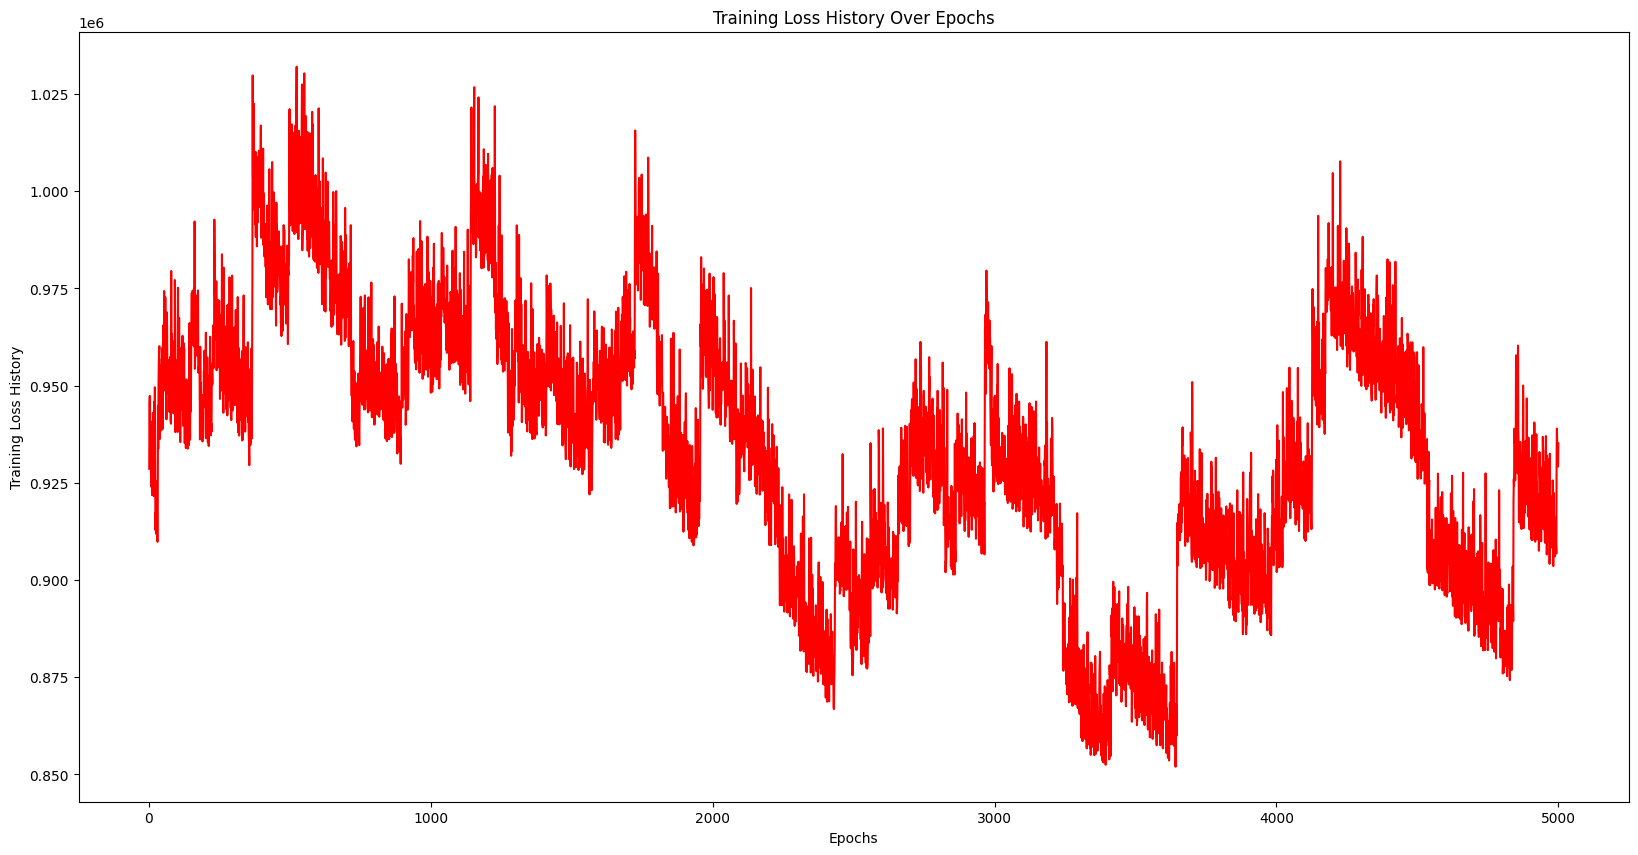

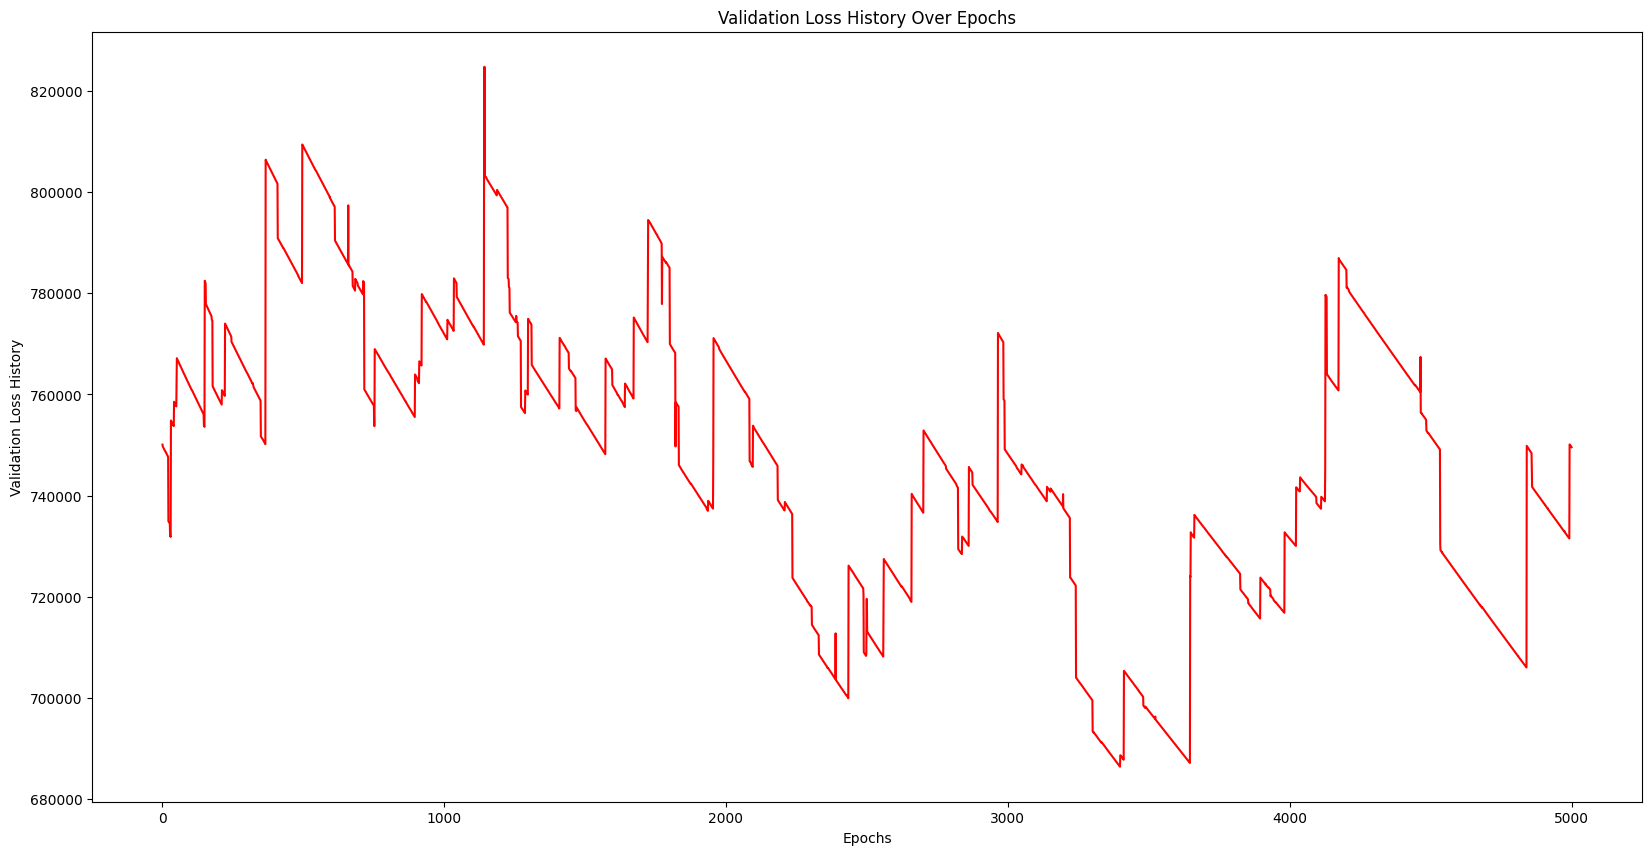

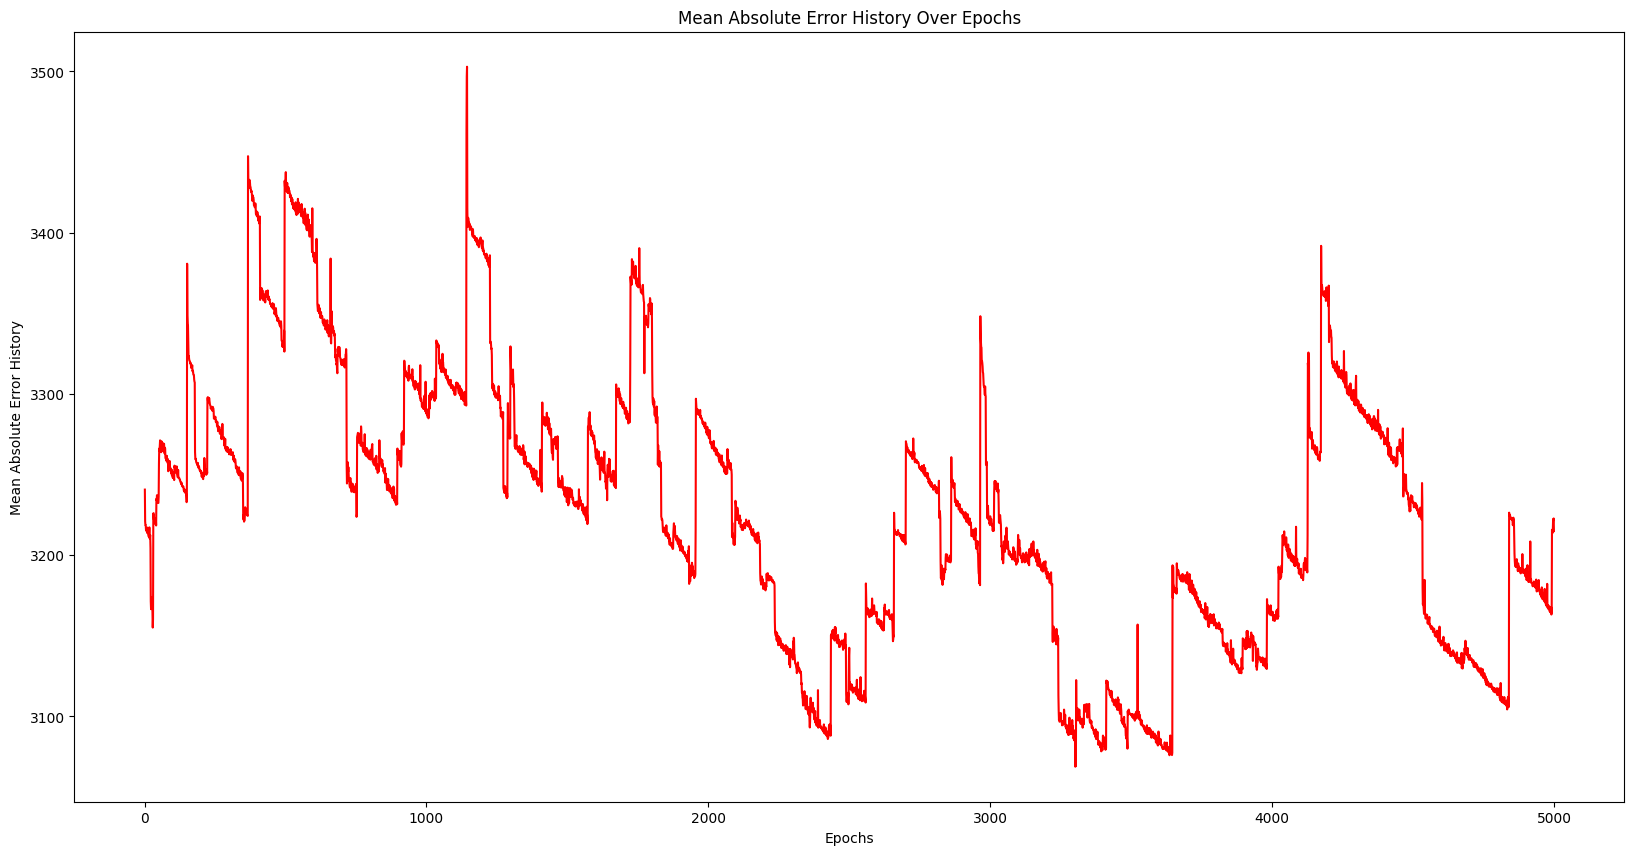

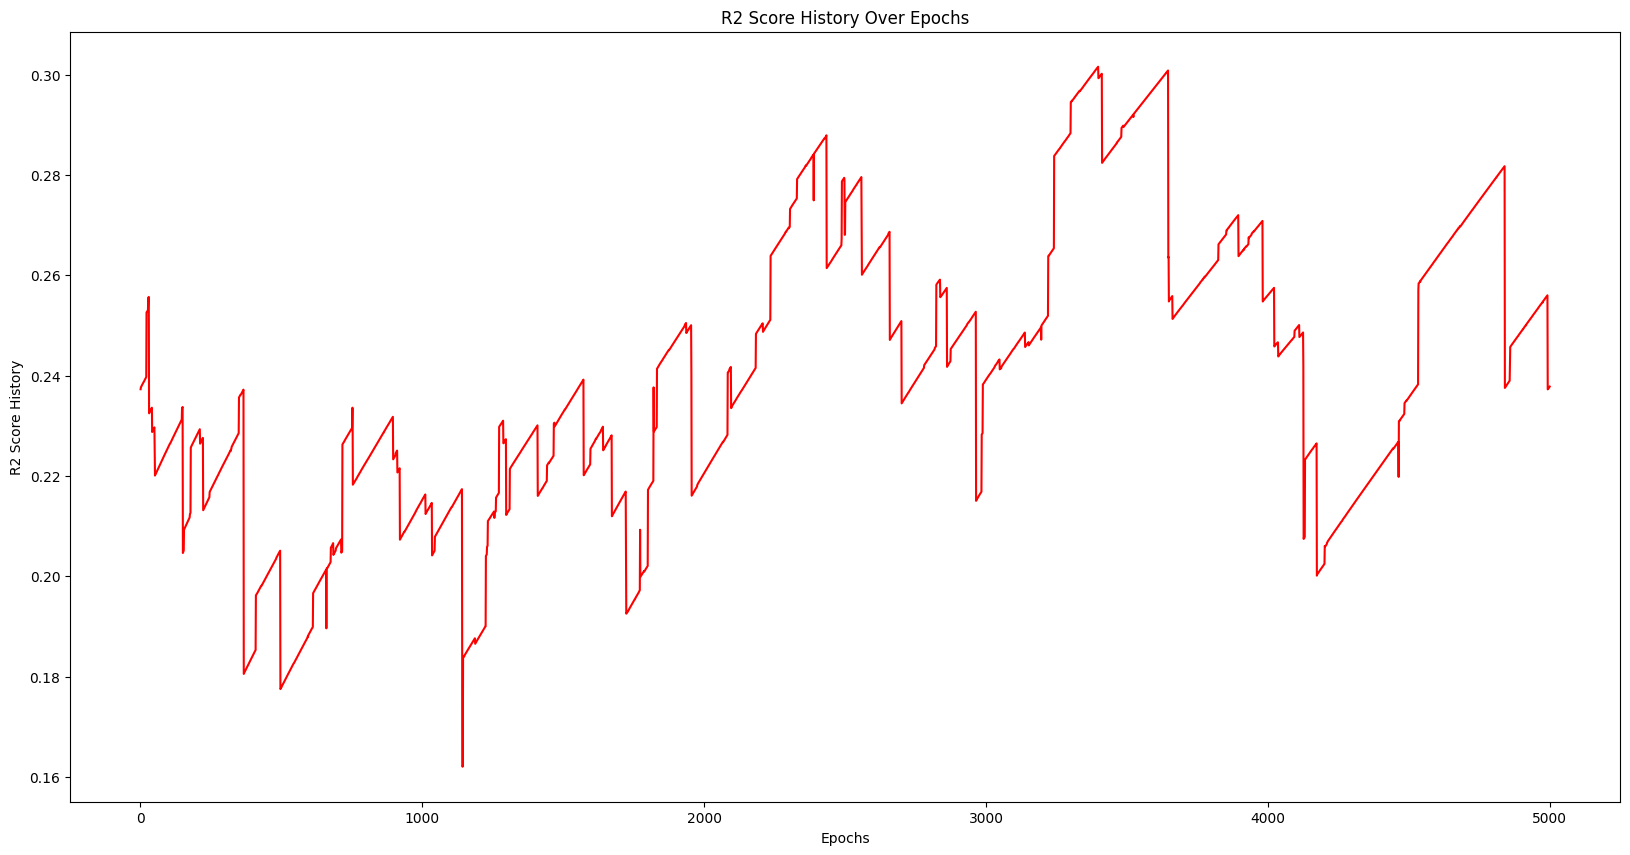

In [ ]:
total_epochs = range(1, len(training_loss_history) + 1)
eval_metrics = {
    "Training Loss History": training_loss_history,
    "Validation Loss History": validation_loss_history,
    "Mean Absolute Error History": mae_history,
    "R2 Score History": r2_history
}

for metric, metric_history in eval_metrics.items():
    plt.figure(figsize=(20, 10))
    plt.plot(total_epochs, metric_history, label=metric, color="red")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f"{metric} Over Epochs")
    
# Note that retraining happened from model after 5000 epochs after